## **Code and Output**

In [71]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [42]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 217 files belonging to 3 classes.
Found 25 files belonging to 3 classes.


In [43]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [44]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [46]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [47]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
7/7 [==============================] - 40s 5s/step - loss: -231.1835 - accuracy: 0.4101 - val_loss: -34.3780 - val_accuracy: 0.5200
Epoch 2/10
7/7 [==============================] - 37s 5s/step - loss: -1527.6746 - accuracy: 0.4700 - val_loss: -124.2881 - val_accuracy: 0.5200
Epoch 3/10
7/7 [==============================] - 37s 5s/step - loss: -4122.6641 - accuracy: 0.4700 - val_loss: -329.3761 - val_accuracy: 0.5200
Epoch 4/10
7/7 [==============================] - 39s 5s/step - loss: -8932.9590 - accuracy: 0.4700 - val_loss: -601.9460 - val_accuracy: 0.5200
Epoch 5/10
7/7 [==============================] - 37s 5s/step - loss: -17219.1855 - accuracy: 0.4700 - val_loss: -997.4612 - val_accuracy: 0.5200
Epoch 6/10
7/7 [==============================] - 37s 5s/step - loss: -31270.7793 - accuracy: 0.4700 - val_loss: -2047.0172 - val_accuracy: 0.5200
Epoch 7/10
7/7 [==============================] - 37s 5s/step - loss: -49808.6758 - accuracy: 0.4700 - val_loss: -2837.1785 - val

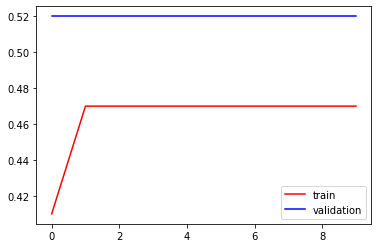

In [48]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

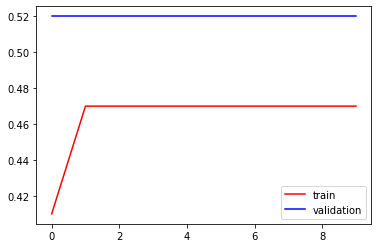

In [49]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

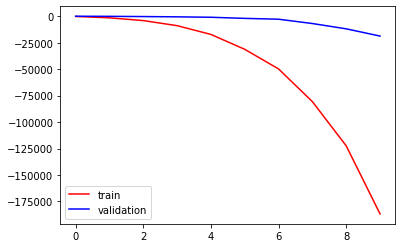

In [50]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

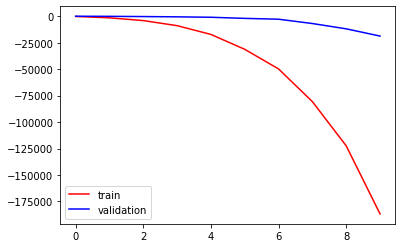

In [51]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [52]:
import cv2

In [53]:
test_img1= cv2.imread('/content/non-fractured.jpg')

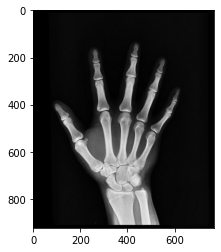

In [54]:
plt.imshow(test_img1)

In [55]:
test_img1.shape

(923, 768, 3)

In [56]:
test_img1 = cv2.resize(test_img1,(256,256))

In [57]:
test_input = test_img1.reshape((1,256,256,3))

In [58]:
model.predict(test_input)

1/1 [==============================] - 0s 166ms/step


array([[1.]], dtype=float32)